## Linear Support Vector Machine(SVM)

분류는 2개의 카테고리 데이터를 분류하는 선형 **Decision Boundary**를 찾는 것이 목적이다.

In [66]:
# matplotlib과 관련된 모듈을 미리 선언
import matplotlib.pyplot as plt
import numpy as np

### LinearSVM  기본

In [67]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_classes=2, n_clusters_per_class=1, random_state=30)

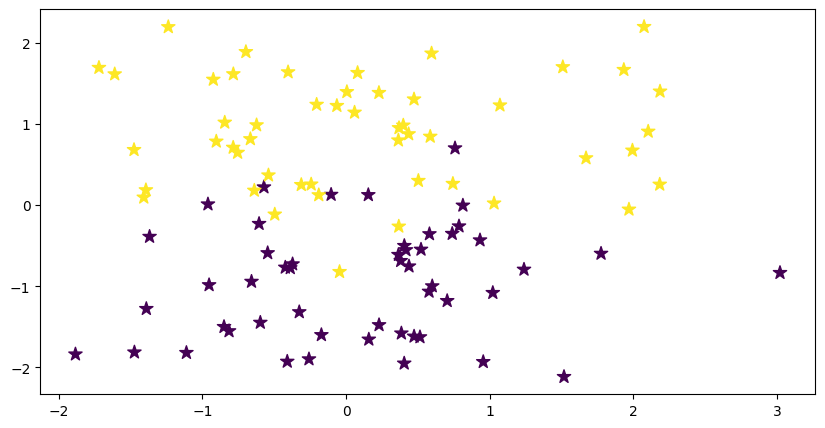

In [68]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:,0], X[:,1], c=y, marker="*", s=100)
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [70]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear', C=1).fit(X_train, y_train)

SVC의 매개변수
- kernel: 커널설정, 기본값은 'rbf' -> 우리는 linear로 하겠습니다.

- C : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0
    C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다.    
    즉, **모델의 오차 허용률**을 조절한다.  
    C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.
    C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
    즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.

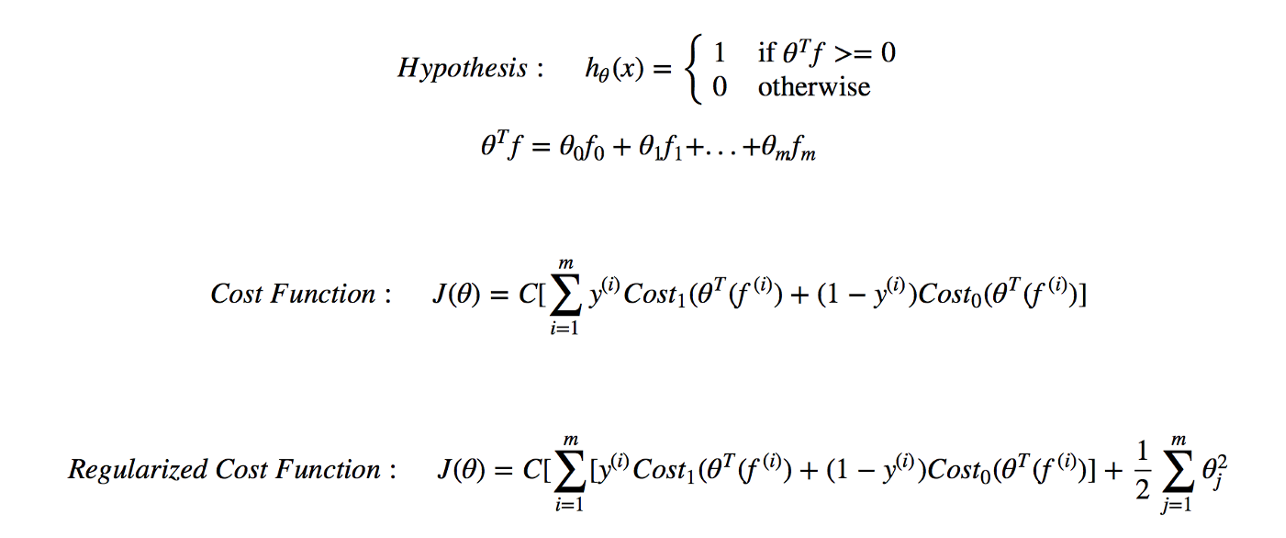

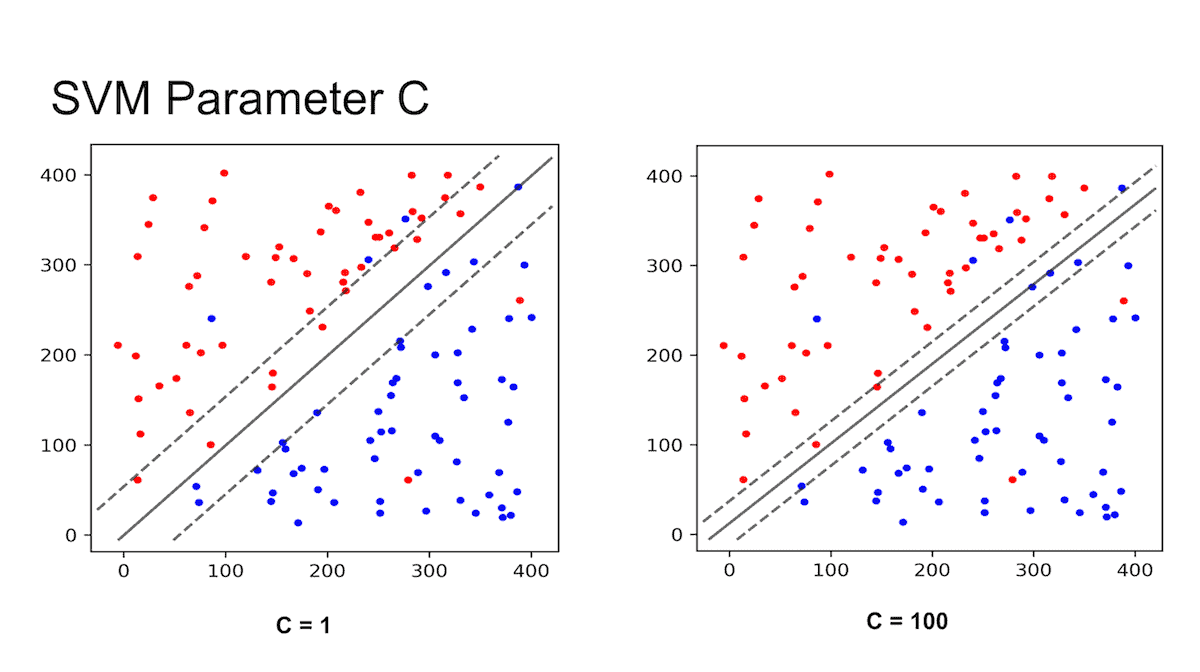

In [71]:
linear_svc.n_support_

array([10, 10], dtype=int32)

In [72]:
linear_svc.support_vectors_

array([[ 1.54638551e-01,  1.27789479e-01],
       [ 4.16579976e-01, -5.51478928e-01],
       [-9.61741304e-01,  1.31964138e-02],
       [ 5.21451726e-01, -5.44938983e-01],
       [-1.36815913e+00, -3.86680912e-01],
       [ 8.13037304e-01, -1.77125524e-03],
       [ 4.05290603e-01, -4.99403821e-01],
       [ 7.38732944e-01, -3.50239628e-01],
       [ 7.85927562e-01, -2.57959730e-01],
       [-1.04378289e-01,  1.31391317e-01],
       [ 2.18328304e+00,  2.56673426e-01],
       [ 3.66685623e-01, -2.60707536e-01],
       [-6.38960098e-01,  1.82172732e-01],
       [-4.96680041e-01, -1.12196761e-01],
       [ 1.02999534e+00,  2.43675938e-02],
       [ 7.43409431e-01,  2.66197855e-01],
       [ 1.96902533e+00, -5.09911121e-02],
       [-1.39366737e+00,  1.87784548e-01],
       [-1.40853733e+00,  9.72217075e-02],
       [-1.90365849e-01,  1.26048240e-01]])

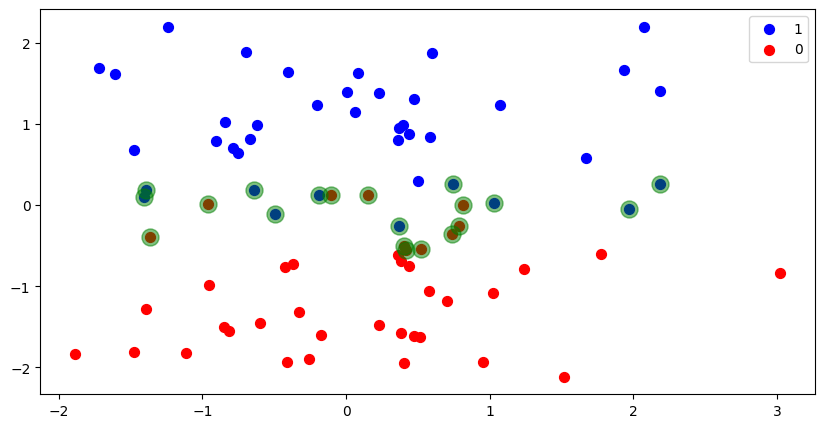

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='b', label='1', s=50)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r', label='0', s=50)
plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1],
            s=150, c='g', alpha=0.5)

plt.legend()
plt.show()

In [74]:
linear_svc.score(X_train, y_train)

0.9375

In [75]:
linear_svc.score(X_test, y_test)

0.85

C :  0.01
train_score: 0.925
test_score: 0.85


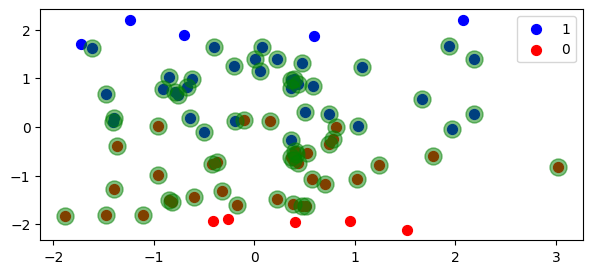

C :  0.1
train_score: 0.9125
test_score: 0.85


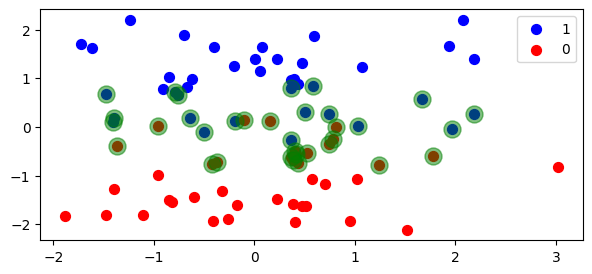

C :  1
train_score: 0.9375
test_score: 0.85


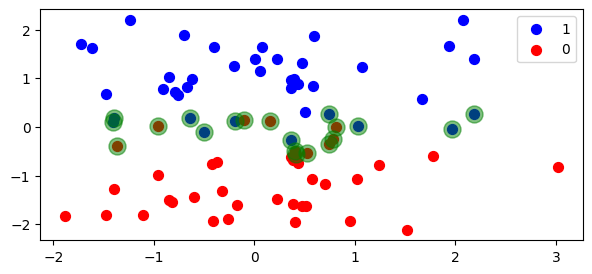

C :  10
train_score: 0.925
test_score: 0.85


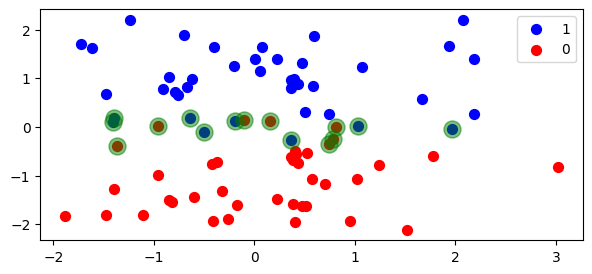

In [76]:
C_list = [0.01, 0.1, 1, 10]

for c in C_list :
    print("C : ", c)

    linear_svc = SVC(kernel = 'linear', C = c).fit(X_train, y_train)

    print('train_score: {}'.format(linear_svc.score(X_train, y_train)))
    print('test_score: {}'.format(linear_svc.score(X_test, y_test)))
    plt.figure(figsize = (7,3))
    plt.scatter(X_train[y_train==1, 0], X_train[y_train ==1, 1], c='b', label='1', s=50)
    plt.scatter(X_train[y_train==0, 0], X_train[y_train ==0, 1], c='r', label='0', s=50)
    plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1],
                s=150, c='g', alpha=0.5)
    plt.legend()
    plt.show()

### 실제 데이터에 적용하기

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [78]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [79]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

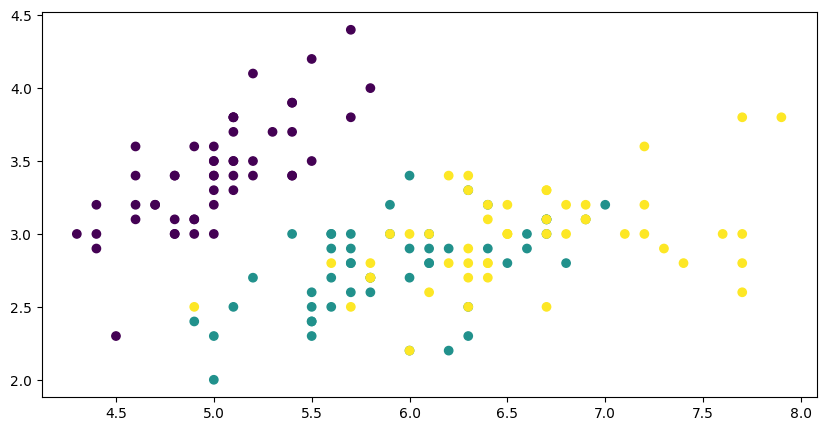

In [80]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=iris_data.target,
                                                    shuffle=True)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

svc.fit(X_train, y_train)

LinearSVC()

In [84]:
svc.score(X_train, y_train)

0.9642857142857143

In [85]:
svc.score(X_test, y_test)

0.9473684210526315

In [86]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'linear')


parametersGrid = {
                "C": [0.0001, 0.01, 1, 10, 100]
}

grid_cls = GridSearchCV(svc, param_grid=parametersGrid, cv=3, refit=True ,  scoring='accuracy')

grid_cls.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.01, 1, 10, 100]}, scoring='accuracy')

In [87]:
grid_cls.best_params_

{'C': 1}

In [88]:
import pandas as pd
pd.DataFrame(grid_cls.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'C': 0.0001},0.624704,5,0.657895,0.324324,0.891892
1,{'C': 0.01},0.785917,4,0.763158,0.702703,0.891892
2,{'C': 1},0.973447,1,0.947368,0.972973,1.000000
3,{'C': 10},0.973447,1,0.947368,1.000000,0.972973
4,{'C': 100},0.955666,3,0.921053,0.972973,0.972973


In [89]:
from sklearn.metrics import classification_report

preds = grid_cls.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



#### 시각화
Decision Boundary 시각화를 위해 2가지 변수만 사용해보겠습니다.

In [65]:
!pip install mglearn

In [90]:
data_x = iris_data.data[:, [1,3]]
data_y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, shuffle=True)

linear_svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
print("train score: {:.3f}".format(linear_svc.score(X_train, y_train)))
print('test score: {:.3f}'.format(linear_svc.score(X_test, y_test)))

train score: 0.958
test score: 0.967


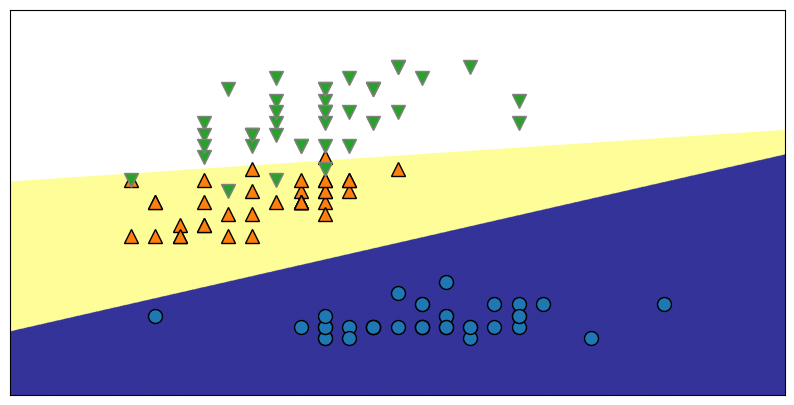

In [92]:
import mglearn

plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_classification(linear_svc, X_train, eps=0.5, cm='terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.show()

#### C값 변경

SVC  

* 주요 parameter:
 - `kernel` : 커널 타입['rbf', 'linear', 'poly', 'sigmoid', 'precomputed'], 기본값은 'rbf'  
        커널(kernel)은 선형으로 분리할 수 없는 점들을 분류하기 위해 사용한다.  
        커널을 통해 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환할 수 있다.  
        
        RBF(Radial Bias Function):
        rbf커널 혹은 가우시안 커널이라고 불리며 무한차원까지 모든 다항식을 고려한다. 여러 커널 중 가장 성능이 좋아 자주 사용된다.  
<a title="Shehzadex, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"><img width="512" alt="Kernel yontemi ile veriyi daha fazla dimensiyonlu uzaya tasima islemi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png/512px-Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"></a>  
커널을 통해 데이터를 더 높은 차원으로 변형함으로 나타냄으로써 결정 경계를 얻을 수 있다.  
[출처] <a href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png">Shehzadex</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

 - `C` : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0  
        C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다. 즉, 모델의 오차 허용률을 조절한다.  
        C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.  
        C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
        즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.  
 - `gamma` : 학습 데이터에 얼마나 민감하게 반응할 것인지 결정, 기본값은 'scale'(= 1/(n_features*X.var()))
        즉, 결정경계의 굴곡의 정도를 결정한다.
        gamma값이 클수록 경계선에서 가까운 점들만이 계산에서 고려되어 결정경계의 굴곡이 높아진다.
        gamma값이 작을수록 경계선에서 멀리 떨어진 점들까지도 계산에서 고려되어 결정경계의 굴곡이 낮아진다.
        따라서, 높은 gamma값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 gamma값은 모델을 더 유연하게 만들어준다.  
        
    ![c_gamma](https://tensorflowkorea.files.wordpress.com/2017/06/2-42.png?w=768)  
    C값이 클수록, gamma값이 클수록 결정경계를 더욱 안정적으로 만드는 것을 알 수 있다.  
    [출처] [tensorflow.blog](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-7-%ec%bb%a4%eb%84%90-%ec%84%9c%ed%8f%ac%ed%8a%b8-%eb%b2%a1%ed%84%b0-%eb%a8%b8%ec%8b%a0/#svm-understand)  




참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

#### 직접 파라미터를 바꿔서 학습시켜봅시다.
